In [13]:
import numpy as np
import random
import matplotlib.pyplot as plt

UnitLevels = [1, 2, 3, 4, 5]
UnitPool = [29, 22, 16, 12, 10]
NumUnits = [12, 12, 12, 9, 7]
totalPool = [29*12,22*12,16*12,9*12,7*10]

UnitShopProbabilities = [[1.00, 0.00, 0.00, 0.00, 0.00],
                         [1.00, 0.00, 0.00, 0.00, 0.00],
                         [0.75, 0.25, 0.00, 0.00, 0.00],
                         [0.60, 0.30, 0.10, 0.00, 0.00],
                         [0.40, 0.35, 0.20, 0.05, 0.00],
                         [0.25, 0.35, 0.30, 0.10, 0.00],
                         [0.19, 0.30, 0.35, 0.15, 0.01],
                         [0.14, 0.20, 0.35, 0.25, 0.06],
                         [0.10, 0.15, 0.25, 0.35, 0.15]]

In [14]:
def simulateNumShops(playerLevel, searchingForUnitLevel, unitStartCount, lookingFor):
    
    
    currentUnits = unitStartCount
    numShopsSeen = 0
    
    selectedUnitProbabilities = UnitShopProbabilities[playerLevel-1]
    selectedUnit = selectedUnitProbabilities[searchingForUnitLevel-1]
    selectedUnitPool = UnitPool[searchingForUnitLevel - 1]
    selectedTotalPool = totalPool[searchingForUnitLevel - 1]

    while currentUnits < lookingFor:
        numShopsSeen += 1
        count = 0
        
        for i in range(1,6):
            if random.random() < selectedUnit:
                count += 1
        
        for n in range(0,count):
            remainingUnits =  selectedUnitPool - currentUnits
            totalUnitPool = selectedTotalPool - currentUnits
            probabilityOfHit = remainingUnits / totalUnitPool
            
            if random.random() < probabilityOfHit:
                    currentUnits += 1

    return numShopsSeen

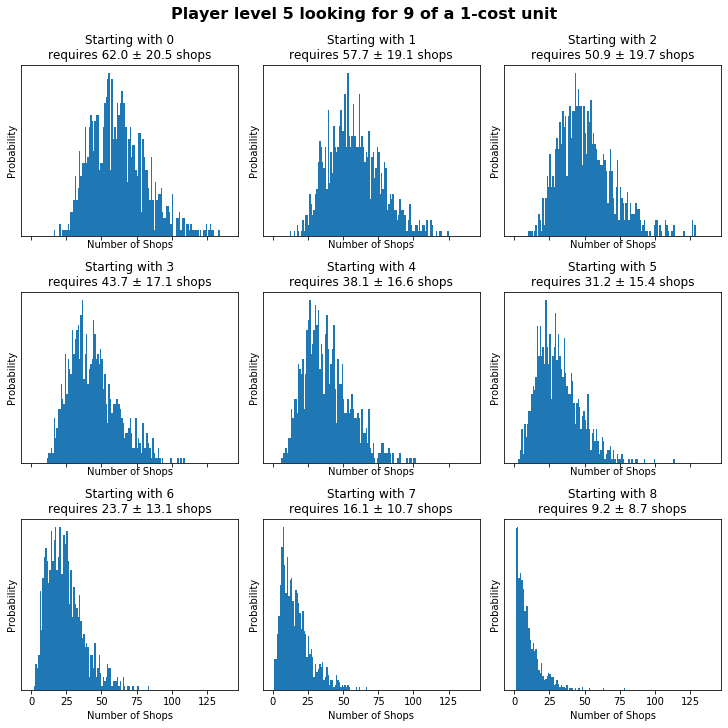

In [15]:
Iterations = 1000
LookingFor = 9
PlayerLevel = 5
SearchingForUnitLevel = 1

fig, ax = plt.subplots(3, 3, figsize = (10, 10), constrained_layout = True, sharex = True, sharey = False)

for row in range(0, 3):
    for col in range(0, 3):
        numShopsRequired = []

        UnitStartCount = row * 3 + col
        
        for n in range(Iterations):
            numShopsRequired.append(simulateNumShops(PlayerLevel, SearchingForUnitLevel, UnitStartCount, LookingFor))

        mean = np.mean(numShopsRequired)
        std = np.std(numShopsRequired)

        ax[row, col].hist(numShopsRequired, bins = range(141), density = True)
        ax[row, col].set(xlabel = 'Number of Shops')
        ax[row, col].set(ylabel = 'Probability')
        ax[row, col].set_yticks([])
        ax[row, col].set_title('Starting with ' + str(UnitStartCount) + "\nrequires " + "{:.1f}".format(mean) + " ± " + "{:.1f}".format(std) + " shops", fontsize = 12)

fig.suptitle("Player level " + str(PlayerLevel) + " looking for " + str(LookingFor) + " of a " + str(SearchingForUnitLevel) + "-cost unit", fontsize = 16, fontweight = 'semibold')
fig.savefig('probability.png')